In [5]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [6]:
def unpack_frame_experiment(filepath):
    with open(filepath, 'rb') as f:
        data_dict = pickle.load(f)

    # Dict  --> key: N_frames, [trans_mae, trans_median, trans_std, rot_mae, rot_median, rot_std] * 8
    num_frames_agg = []
    trans_mean_agg = []
    trans_median_agg = []
    trans_std_agg = []
    rot_mean_agg = []
    rot_median_agg = []
    rot_std_agg = []

    for num_frames, data in data_dict.items():
        data_frame = np.array(data)
        trans_mean, trans_median, trans_std, rot_mean, rot_median, rot_std =  data_frame.T
        num_frames_agg.append(num_frames)
        trans_mean_agg.append(trans_mean)
        trans_median_agg.append(trans_median)
        trans_std_agg.append(trans_std)
        rot_mean_agg.append(rot_mean)
        rot_median_agg.append(rot_median)
        rot_std_agg.append(rot_std)


    num_frames_agg = np.stack(num_frames_agg)
    trans_mean_agg = np.stack(trans_mean_agg)
    trans_median_agg = np.stack(trans_median_agg)
    trans_std_agg = np.stack(trans_std_agg)
    rot_mean_agg = np.stack(rot_mean_agg)
    rot_median_agg = np.stack(rot_median_agg)
    rot_std_agg = np.stack(rot_std_agg)

    argsortidx = np.argsort(num_frames_agg)
    num_frames_agg = num_frames_agg[argsortidx]
    trans_mean_agg = trans_mean_agg[argsortidx]
    trans_median_agg = trans_median_agg[argsortidx]
    trans_std_agg = trans_std_agg[argsortidx]
    rot_mean_agg = rot_mean_agg[argsortidx]
    rot_median_agg = rot_median_agg[argsortidx]
    rot_std_agg = rot_std_agg[argsortidx]

    return {"num_frames": num_frames_agg,"trans_mean": trans_mean_agg,"trans_median": trans_median_agg,"trans_std": trans_std_agg,"rot_mean": rot_mean_agg,"rot_median": rot_median_agg,"rot_std": rot_std_agg,}




FileNotFoundError: [Errno 2] No such file or directory: 'data/random_frames.pkl'

In [7]:
def draw_boxplot(xdata,ydata,xlabel,ylabel,ylim_max=None):
    height = 4
    width = 8
    fig, ax = plt.subplots(1,1, figsize=(width,height))
    ax.grid("minor")
    ax.boxplot(ydata ,labels=xdata)
    ax.set_title(ylabel)
    # ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if ylim_max is not None:
        ax.set_ylim(0,ylim_max)
random_drop_exp = unpack_frame_experiment("data/random_frames.pkl")

trans_max_error =None
# draw_boxplot(random_drop_exp["num_frames"], 1000*random_drop_exp["trans_mean"].T, "Number of Views", "Average Translation Error (mm)", ylim_max=trans_max_error)
# draw_boxplot(random_drop_exp["num_frames"], random_drop_exp["rot_mean"].T, "Number of Views", "Average Rotation Error (deg)")
draw_boxplot(random_drop_exp["num_frames"], 1000*random_drop_exp["trans_median"].T, "Number of Views", "Median Translation Error (mm)", ylim_max=trans_max_error)
draw_boxplot(random_drop_exp["num_frames"], random_drop_exp["rot_median"].T, "Number of Views", "Median Rotation Error (deg)")




NameError: name 'random_drop_exp' is not defined

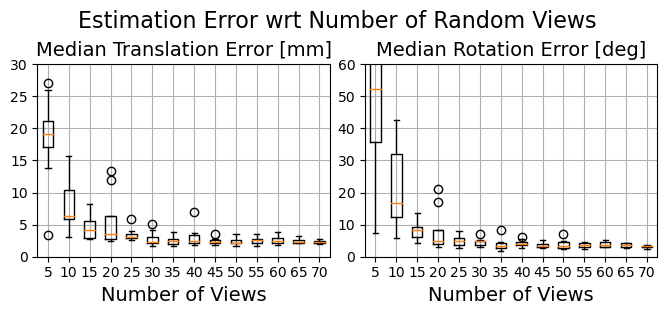

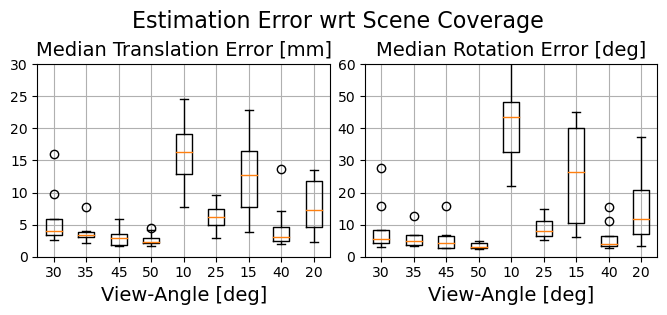

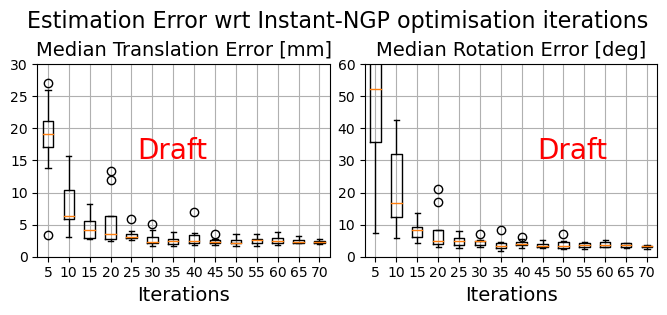

In [91]:
def draw_boxplot2(xdata,ydata0, ydata1 ,xlabel,ylabel0,ylabel1, ylim0,ylim1, figtitle=None, draft=False):
    height =2.5
    width = 8
    title_size = 16
    labelsize = 14
    ticksize = 10
    fig, axs = plt.subplots(1,2, figsize=(width,height))
    for ax in axs:    
        ax.grid("minor")

    axs[0].boxplot(ydata0 ,labels=xdata)
    axs[0].set_xlabel(xlabel,size=labelsize)
    axs[0].set_title(ylabel0,size=labelsize)
    # axs[0].set_ylabel(ylabel0)
    axs[0].set_ylim(0,ylim0)
    axs[0].tick_params(axis='x', labelsize=ticksize)
    axs[0].tick_params(axis='y', labelsize=ticksize)


    axs[1].boxplot(ydata1 ,labels=xdata)
    axs[1].set_title(ylabel1,size=labelsize)
    axs[1].set_xlabel(xlabel,size=labelsize)
    # axs[1].set_ylabel(ylabel1)
    axs[1].set_ylim(0,ylim1)
    axs[1].tick_params(axis='x', labelsize=ticksize)
    axs[1].tick_params(axis='y', labelsize=ticksize)


    if figtitle is not None:
        fig.text(0.5, 1.025, figtitle, fontsize=title_size, horizontalalignment="center")

    fig.subplots_adjust(wspace=0.12)

    if draft:
        fig.text(0.25,0.5,"Draft",c='red',size=20)
        fig.text(0.75,0.5,"Draft",c='red',size=20)
    # fig.tight_layout()
    # fig.tight_layout(rect=[0, 0, 1, 0.95])
    return fig,axs

max_trans_error = 30
max_rot_error = 60

def save_fig(exp_name, fig):
    return fig.savefig(f"{exp_name}.png",bbox_inches='tight', pad_inches=0.1)    

exp_name,exp_name_fancy = "random_views_exp", "Estimation Error wrt Number of Random Views"
experiment_data = unpack_frame_experiment(f"{exp_name}.pkl")
fig,axs = draw_boxplot2(experiment_data["num_frames"],
            1000*experiment_data["trans_median"].T,
            experiment_data["rot_median"].T,
            "Number of Views",
            "Median Translation Error [mm]",
            "Median Rotation Error [deg]",
            ylim0=max_trans_error,
            ylim1=max_rot_error,
            figtitle=exp_name_fancy,
            )
save_fig(exp_name, fig)

exp_name,exp_name_fancy = "angle_views_exp", "Estimation Error wrt Scene Coverage"
experiment_data = unpack_frame_experiment(f"{exp_name}.pkl")
fig,axs = draw_boxplot2(experiment_data["num_frames"],
            1000*experiment_data["trans_median"].T,
            experiment_data["rot_median"].T,
            "View-Angle [deg]",
            "Median Translation Error [mm]",
            "Median Rotation Error [deg]",
            ylim0=max_trans_error,
            ylim1=max_rot_error,
            figtitle=exp_name_fancy,
            )
save_fig(exp_name, fig)

exp_name,exp_name_fancy = "nerf_iterations_exp", "Estimation Error wrt Instant-NGP optimisation iterations"
experiment_data = unpack_frame_experiment(f"{exp_name}.pkl")
fig,axs = draw_boxplot2(experiment_data["num_frames"],
            1000*experiment_data["trans_median"].T,
            experiment_data["rot_median"].T,
            "Iterations",
            "Median Translation Error [mm]",
            "Median Rotation Error [deg]",
            ylim0=max_trans_error,
            ylim1=max_rot_error,
            figtitle=exp_name_fancy,
            draft=True
            )
save_fig(exp_name, fig)

